In [1]:
import umap
import numpy as np
import json
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

data = defaultdict(list)
with open('nsfw-embedding.jsonl') as fopen:
    for l in tqdm(fopen):
        l = json.loads(l)
        if l['label'] == 'hate':
            continue
        data[l['label']].append(l['embedding'])
len(data)

203177it [00:22, 9137.94it/s] 


9

In [3]:
data.keys()

dict_keys(['psychiatric or mental illness', 'safe for work', 'sexist', 'religion insult', 'harassment', 'racist', 'violence', 'porn', 'self-harm'])

In [4]:
reducer = umap.UMAP(n_jobs = 5)

In [13]:
samples, boundaries = [], []
for k in data.keys():
    s = random.sample(data[k], 1200)
    boundaries.append((len(samples), len(samples) + len(s)))
    samples.extend(s)

In [14]:
low_dim = reducer.fit_transform(samples)
low_dim.shape

(10800, 2)

In [15]:
acceptable = np.where((low_dim[:,0] > -5) & (low_dim[:,0] < 10) & (low_dim[:,1] > -5) & (low_dim[:,1] < 10))[0]
acceptable = set(acceptable.tolist())

In [16]:
keys = list(data.keys())

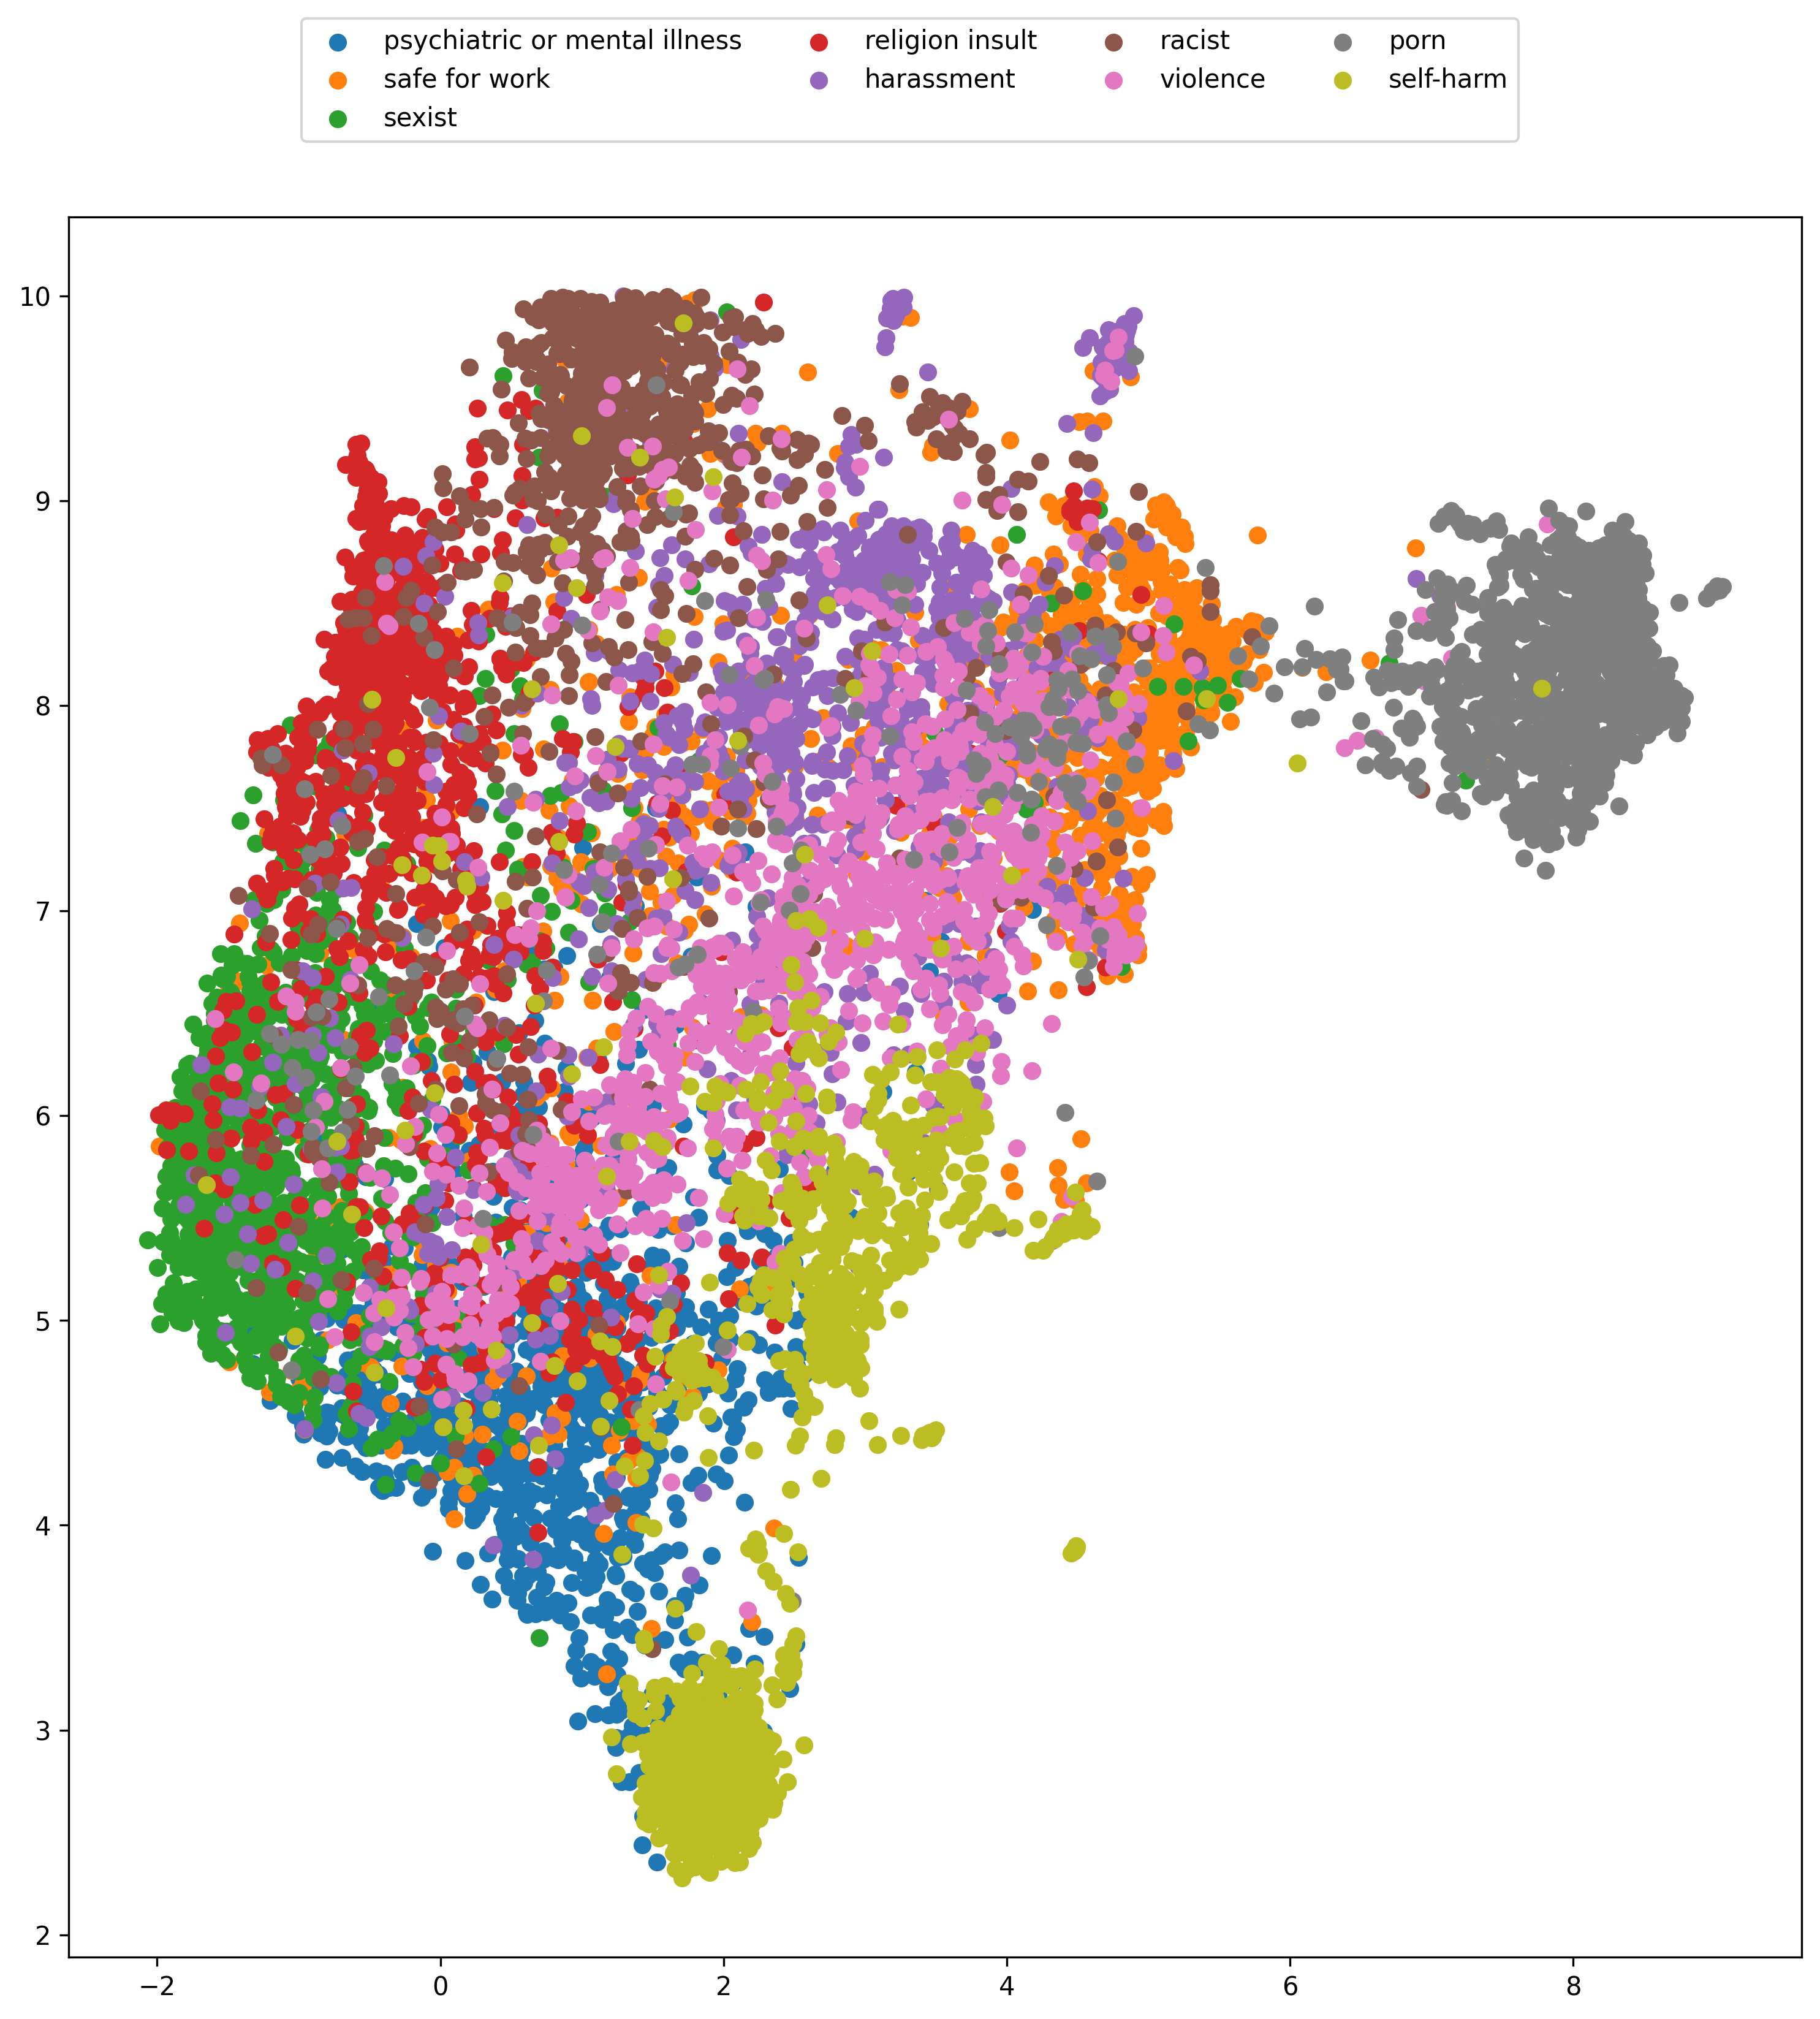

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10), dpi = 300)

for no, b in enumerate(boundaries):
    indices = np.array(list(set(range(b[0], b[1])) & acceptable))
    f = low_dim[indices]
    
    ax1.scatter(f[:,0], f[:,1], label = keys[no])
    
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4)

fig.tight_layout()
plt.show()